# Lista 6

## Ćwiczenia

In [1]:
# wczytanie danych z naglowkami
kosiarki = read.table("dane_kosiarki-1.txt", header = TRUE)
# ukazanie pierwszych wierszy naszych danych
head(kosiarki)

,income,lotsize,owner
,<dbl>,<dbl>,<int>
1,20.0,9.2,1
2,28.5,8.4,1
3,21.6,10.8,1
4,20.5,10.4,1
5,29.0,11.8,1
6,36.7,9.6,1


#### i) Podział danych na dwie grupy

In [2]:
# podzial zbioru na dwa podzbiory wzgledem wartosci w kolumnie owner (bez tej kolumny)
kosiarki_1 = kosiarki[kosiarki$owner == 1, 1:2]
kosiarki_2 = kosiarki[kosiarki$owner == 2, 1:2]

#### ii) Przedstawienie danych na rysunku

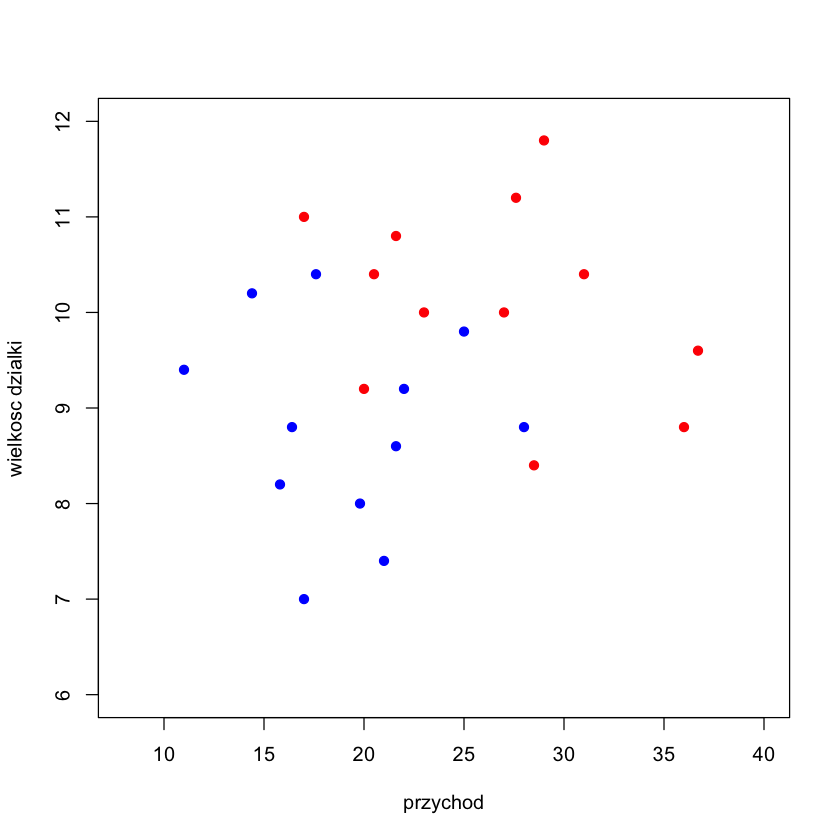

In [3]:
# wizualizacja danych - zaleznosc przychodu od wielkosci dzialki na podstawie podzbiorow
# musimy odpowiednio wyskalowac osie za pomoca: xlim i: ylim, aby widac bylo wszystkie punkty na wykresie (osie sa domyslnie skalowane wzgledem zbioru danych w funkcji: plot)
plot(kosiarki_1$income, kosiarki_1$lotsize, type = "p", pch = 19, col = "red", xlab = "przychod", ylab = "wielkosc dzialki", xlim = c(8, 40), ylim = c(6, 12))
points(kosiarki_2$income, kosiarki_2$lotsize, pch = 19, col = "blue")

In [4]:
# automatyzacja wyszukiwania wartosci

# wyszukiwanie wartosci minimalnych w podzbiorach
min_income_kosiarki_1 = min(kosiarki_1$income)
min_lotsize_kosiarki_1 = min(kosiarki_1$lotsize)
min_income_kosiarki_2 = min(kosiarki_2$income)
min_lotsize_kosiarki_2 = min(kosiarki_2$lotsize)

# wyszukiwanie wartosci maksymalnych w podzbiorach
max_income_kosiarki_1 = max(kosiarki_1$income)
max_lotsize_kosiarki_1 = max(kosiarki_1$lotsize)
max_income_kosiarki_2 = max(kosiarki_2$income)
max_lotsize_kosiarki_2 = max(kosiarki_2$lotsize)

# wyszukanie wartosci minimalnych i maksymalnych ogolem
min_income_kosiarki = min(min_income_kosiarki_1, min_income_kosiarki_2)
min_lotsize_kosiarki = min(min_lotsize_kosiarki_1, min_lotsize_kosiarki_2)
max_income_kosiarki = max(max_income_kosiarki_1, max_income_kosiarki_2)
max_lotsize_kosiarki = max(max_lotsize_kosiarki_1, max_lotsize_kosiarki_2)

In [5]:
# uproszczenie automatyzacji wyszukiwania wartosci
# wyszukanie wartosci minimalnych i maksymalnych
min_income_kosiarki = min(c(kosiarki_1$income, kosiarki_2$income))
min_lotsize_kosiarki = min(c(kosiarki_1$lotsize, kosiarki_2$lotsize))
max_income_kosiarki = max(c(kosiarki_1$income, kosiarki_2$income))
max_lotsize_kosiarki = max(c(kosiarki_1$lotsize, kosiarki_2$lotsize))

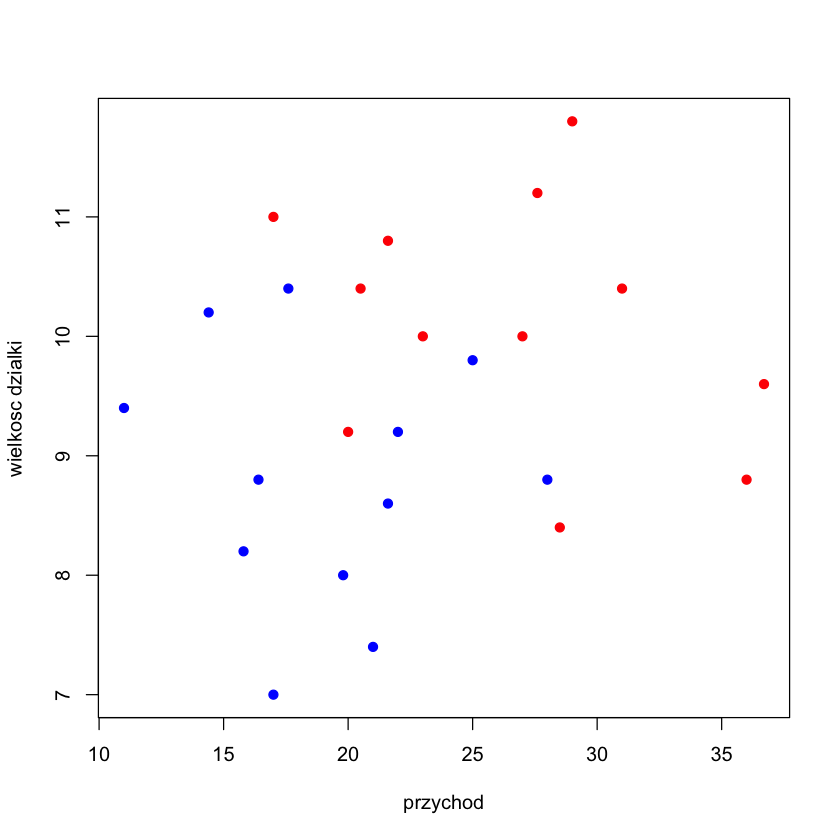

In [6]:
# narysowanie wykresu z zautomatyzowanymi wartosciami
plot(kosiarki_1$income, kosiarki_1$lotsize, type = "p", pch = 19, col = "red", xlab = "przychod", ylab = "wielkosc dzialki", xlim = c(min_income_kosiarki, max_income_kosiarki), ylim = c(min_lotsize_kosiarki, max_lotsize_kosiarki))
points(kosiarki_2$income, kosiarki_2$lotsize, pch = 19, col = "blue")

#### iii) Kwadratowa funkcja klasyfikująca

##### 1.) Macierze ze zmiennych, wektory średnich wartości w klasach, próbkowe macierze kowiariancji

In [7]:
# macierze ze zmiennych dla rodzin posiadajacych i nieposiadajacych kosiarki
kosiarki_1
kosiarki_2

,income,lotsize
,<dbl>,<dbl>
1,20.0,9.2
2,28.5,8.4
3,21.6,10.8
4,20.5,10.4
5,29.0,11.8
6,36.7,9.6
7,36.0,8.8
8,27.6,11.2
9,23.0,10.0


,income,lotsize
,<dbl>,<dbl>
13,25.0,9.8
14,17.6,10.4
15,21.6,8.6
16,14.4,10.2
17,28.0,8.8
18,19.8,8.0
19,22.0,9.2
20,15.8,8.2
21,11.0,9.4


In [8]:
# wyliczenie srednich dla obu podzbiorow
srednia_kosiarki_1 = colMeans(kosiarki_1)
srednia_kosiarki_2 = colMeans(kosiarki_2)
srednia_kosiarki_1 # = m1
srednia_kosiarki_2 # = m2

income  lotsize 
26.49167 10.13333

income   lotsize 
19.133333  8.816667

In [9]:
# obliczenie macierze kowariancji
macierz_kowiariancji_kosiarki_1 = cov(kosiarki_1)
macierz_kowiariancji_kosiarki_2 = cov(kosiarki_2)
macierz_kowiariancji_kosiarki_1 # = S1
macierz_kowiariancji_kosiarki_2 # = S2

,income,lotsize
income,39.182652,-1.969697
lotsize,-1.969697,1.020606


,income,lotsize
income,22.3006061,-0.4315152
lotsize,-0.4315152,1.1160606


##### 2.) Macierze odwrotne, stała, wartości prawdopodobieństw a priori

In [10]:
# obliczenie macierzy odwrotnych
odwrotna_macierz_kowiariancji_kosiarki_1 = solve(macierz_kowiariancji_kosiarki_1)
odwrotna_macierz_kowiariancji_kosiarki_2 = solve(macierz_kowiariancji_kosiarki_2)
odwrotna_macierz_kowiariancji_kosiarki_1 # = S1-1
odwrotna_macierz_kowiariancji_kosiarki_2 # = S1-2

,income,lotsize
income,0.02826354,0.05454661
lotsize,0.05454661,1.08508105


,income,lotsize
income,0.04517984,0.01746839
lotsize,0.01746839,0.90276269


In [11]:
# ustalenie wartosci prawdopodobienstw a priori
prawdopodobienstwo_1 = prawdopodobienstwo_2 = 0.5 # = pi1 = pi2

In [12]:
# obliczenie wartosci stalej k
# wartosci bewzgledna dla macierzy jest jej wyznacznik (funkcja: det)
# transpozycje wykonujemy za pomoca funkcji: t
# mnozenie macierzy wykonujemy za pomoca operatorow: %*%
k = 0.5 * log(det(macierz_kowiariancji_kosiarki_1) / det(macierz_kowiariancji_kosiarki_2)) + 0.5 * (t(srednia_kosiarki_1) %*% odwrotna_macierz_kowiariancji_kosiarki_1 %*% srednia_kosiarki_1 - t(srednia_kosiarki_2) %*% odwrotna_macierz_kowiariancji_kosiarki_2 %*% srednia_kosiarki_2)
k

34.15698


##### 3.) Ustalenie zakresu wartości osi, wyznaczenie wartości funkcji dyskryminacyjnej dla każdego punktu

In [13]:
# ustalenie sekwencji punktow o dlugosci 100
punkty_x = seq(min_income_kosiarki, max_income_kosiarki, length = 100)
punkty_y = seq(min_lotsize_kosiarki, max_lotsize_kosiarki, length = 100)

In [14]:
# tabela wartosci
wartosci = as.data.frame(cbind(punkty_x, punkty_y))
colnames(wartosci) = c("income", "lotsize")
head(wartosci)

,income,lotsize
,<dbl>,<dbl>
1,11.00000,7.000000
2,11.25960,7.048485
3,11.51919,7.096970
4,11.77879,7.145455
5,12.03838,7.193939
6,12.29798,7.242424


In [15]:
# chcielismy miec porownanie wszystkich wartosci z kolumny lotsize dla kazdej wartosci z kolumny income
# otrzymana tabela jest niepoprawna

In [16]:
# funkcja, ktora dla pojedynczej pary punktow wyznacza kwadratowa funkcje dyskryminacyjna
funkcja_dyskryminacyjna = function(macierz, prawdopodobienstwo_1, prawdopodobienstwo_2, srednia_1, srednia_2, macierz_kowariancji_1, macierz_kowariancji_2){
# macierz ma byc macierza o 1 wierszu i 2 kolumnach
    macierz = as.matrix(macierz, 1, 2)
# wyliczenie macierzy odwrotnych
    odwrotna_macierz_kowariancji_1 = solve(macierz_kowariancji_1)
    odwrotna_macierz_kowariancji_2 = solve(macierz_kowariancji_2)
# wyznaczenie stalej k
    k = 0.5 * log(det(macierz_kowariancji_1) / det(macierz_kowariancji_2)) + 0.5 * (t(srednia_1) %*% odwrotna_macierz_kowariancji_1 %*% srednia_1 - t(srednia_2) %*% odwrotna_macierz_kowariancji_2 %*% srednia_2)
# wzor funkcji dyskryminacyjnej
    funkcja = log(prawdopodobienstwo_2 / prawdopodobienstwo_1) + macierz %*% (odwrotna_macierz_kowariancji_2 %*% srednia_2 - odwrotna_macierz_kowariancji_1 %*% srednia_1) - 0.5 * macierz %*% (odwrotna_macierz_kowariancji_2 - odwrotna_macierz_kowariancji_1) %*% t(macierz) + k
    return(funkcja)
}

In [17]:
# wykonanie naszej funkcji dla 1. obserwacji z wektora punkty_x
funkcja_dyskryminacyjna(wartosci[1,], prawdopodobienstwo_1, prawdopodobienstwo_2, srednia_kosiarki_1, srednia_kosiarki_2, macierz_kowiariancji_kosiarki_1, macierz_kowiariancji_kosiarki_2)

1,8.31347


In [18]:
# chcemy stworzyc macierz wynikow (100 x 100) z wartosciami funkcji dyskryminacycjnej dla kazdej pary punktow
wielkosc_macierzy = 100
# stworzenie wektorow o okreslonych dlugosciach
wektor_x = seq(min_income_kosiarki, max_income_kosiarki, length.out = wielkosc_macierzy)
wektor_y = seq(min_lotsize_kosiarki, max_lotsize_kosiarki, length.out = wielkosc_macierzy)
# dopisanie do pierwszej wartosci wektora wektor_x kazdej wartosci z wektora wektor_y za pomoca funkcji: expand grid
pelny_wektor = expand.grid(wektor_x, wektor_y)
pelny_wektor

Var1,Var2
<dbl>,<dbl>
11.00000,7
11.25960,7
11.51919,7
11.77879,7
12.03838,7
12.29798,7
12.55758,7
12.81717,7
13.07677,7


In [19]:
# stworzenie wektora numerycznego przechowujacego wartosci funkcji dyskryminacyjnej
# ma on dlugosc tak jak pelny_wektor wynoszaca 10 000
wartosci_funkcji_dyskryminacyjnej = numeric(dim(pelny_wektor)[1])
# petla for wyznaczajaca za kazdym razem nowo wartosci wektora wartosci_funkcji_dyskryminacyjnej
for (i in 1:dim(pelny_wektor)[1]){
# za kazdym razem uruchamiamy wczesniej napisana funkcje - pobieramy punkt (caly wiersz) z macierzy wartosci_funkcji_dyskryminacyjnej i obliczamy wynik dla wczesniej zdefiniowanych wartosci
    wartosci_funkcji_dyskryminacyjnej[i] = funkcja_dyskryminacyjna(as.matrix(pelny_wektor[i, ]), prawdopodobienstwo_1, prawdopodobienstwo_2, srednia_kosiarki_1, srednia_kosiarki_2, macierz_kowiariancji_kosiarki_1, macierz_kowiariancji_kosiarki_2)
}

In [20]:
# pierwsze wartosci z utworzonego wektora
# sa to wartosci funkcji dyskryminacyjnej dla kazdego wyrazenia
head(wartosci_funkcji_dyskryminacyjnej)

[1] 8.313470 8.258498 8.202386 8.145134 8.086741 8.027209

In [21]:
# usuniecie zer i poprawienie wartosci w wektorze z wartosciami funkcji dyskryminacyjnej
wartosci_funkcji_dyskryminacyjnej_poprawione = wartosci_funkcji_dyskryminacyjnej
wartosci_funkcji_dyskryminacyjnej_poprawione[wartosci_funkcji_dyskryminacyjnej_poprawione > 0] = 2
wartosci_funkcji_dyskryminacyjnej_poprawione[wartosci_funkcji_dyskryminacyjnej_poprawione <= 0] = 1

##### 4.) Krzywa dyskryminacyjna na rysunku wraz z prostą dyskryminacyjną LDA

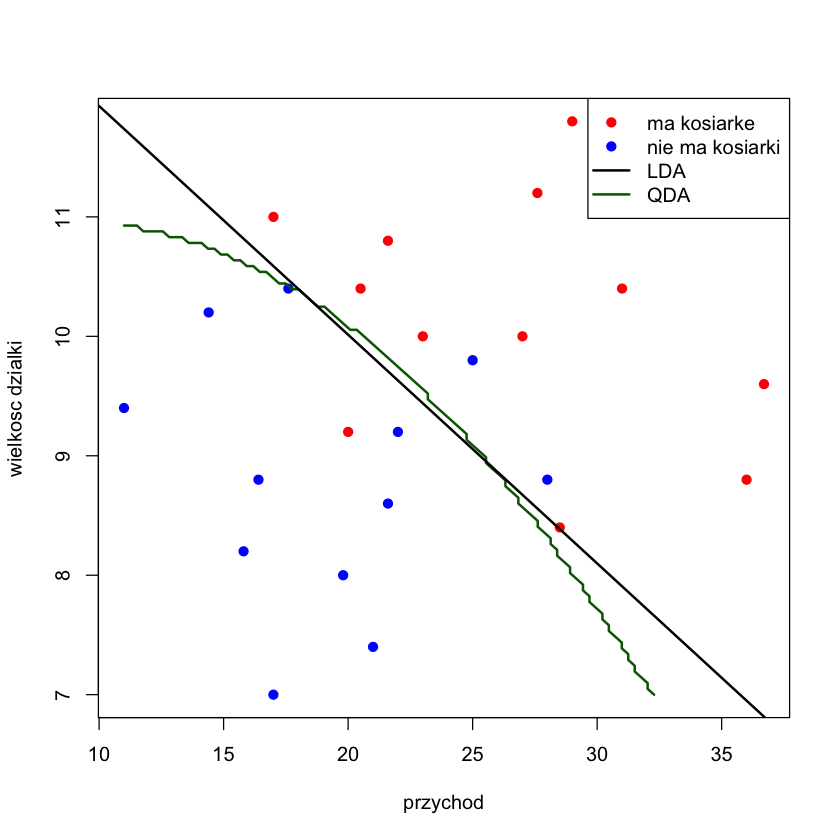

In [22]:
# narysowanie wykresu
plot(kosiarki_1$income, kosiarki_1$lotsize, type = "p", pch = 19, col = "red", xlab = "przychod", ylab = "wielkosc dzialki", xlim = c(min_income_kosiarki, max_income_kosiarki), ylim = c(min_lotsize_kosiarki, max_lotsize_kosiarki))
points(kosiarki_2$income, kosiarki_2$lotsize, pch = 19, col = "blue")
# naniesienie funkcji dyskryminacyjnej (z elementami zerowymi) opartej o metode QDA - w funkcji: countour mamy nastepujace parametry:
# x - wspolrzedne x
# y - wspolrzedne y
# z - zmienna tworzaca macierz (o wymiarach 100 x 100) na podstawie wartosci funkcji dyskryminacyjnej
# levels - wartosci leveli
# add - dodanie funkcji na wykres
# drawlabels - narysowanie linii pomocniczych
# col - kolor linii
# lwd - grubosc linii
contour(wektor_x, wektor_y, z = matrix(wartosci_funkcji_dyskryminacyjnej_poprawione, nrow = wielkosc_macierzy, ncol = wielkosc_macierzy), levels = c(1, 2), add = TRUE, drawlabels = FALSE, col = 'darkgreen', lwd = 2)
# przepisanie krzywej dyskryminacyjnej opartej o metode LDA z listy 3
lines(10:40, 21.73876 / 1.570369 - 0.3006909 / 1.570369 * 10:40, col = "black", lwd = 2)
# dodanie legendy
legend("topright", c("ma kosiarke", "nie ma kosiarki", "LDA", "QDA"), col = c("red", "blue", "black", "darkgreen"), pch = c(19, 19, NA, NA), lty = c(NA, NA, 1, 1), lwd = c(1, 1, 2, 2))

In [23]:
# efekt dzialania jest identyczny jak wczesniej - w przypadku LDA i QDA mamy 1 punkt czerwony pod linia i 2 punkty niebieskie nad linia
# w obu metodach popelniamy ten sam blad
# krzywa jest malo gladka, co wynika z niewielkiej liczby punktow (co jednoczesnie przekladaloby sie na dluzsze czas obliczen)

## Zadanie 10

In [24]:
# wczytanie paczki
library(MASS)

In [25]:
# wczytanie danych z naglowkami
kosiarki_10 = read.table("dane_kosiarki-1.txt", header = TRUE)
kosiarki_10

income,lotsize,owner
<dbl>,<dbl>,<int>
20.0,9.2,1
28.5,8.4,1
21.6,10.8,1
20.5,10.4,1
29.0,11.8,1
36.7,9.6,1
36.0,8.8,1
27.6,11.2,1
23.0,10.0,1


In [26]:
# przygotowanie modelu korzystajac z funkcji: qda
model_qda_10_1 = qda(owner ~ income + lotsize, data = kosiarki_10, prior = c(0.5, 0.5))
model_qda_10_1

Call:
qda(owner ~ income + lotsize, data = kosiarki_10, prior = c(0.5, 
    0.5))

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
    income   lotsize
1 26.49167 10.133333
2 19.13333  8.816667

#### i) Średnie wartosci w grupach

In [27]:
# ukazanie srednich wartosci w poszczegolnych grupach
model_qda_10_1$means

,income,lotsize
1,26.49167,10.133333
2,19.13333,8.816667


#### ii) Predykcja przynależności do klas na zbiorze testowym

In [28]:
# predykcja na zbiorze testowym
predykcja_model_qda_10_1 = predict(model_qda_10_1)
predykcja_model_qda_10_1

,1,2
1,0.182518272,0.817481728
2,0.575693567,0.424306433
3,0.803329128,0.196670872
4,0.637143352,0.362856648
5,0.991136624,0.008863376
6,0.997448367,0.002551633
7,0.990817618,0.009182382
8,0.974589129,0.025410871
9,0.657588444,0.342411556
10,0.983037467,0.016962533


In [29]:
# mamy 2 obiekty:
# $class - do ktorej klasy zaklasyfikowany zostal nasz obiekt
# $posterior - prawdopodobienstwa a posteriori przynaleznosci kazdej z obserwacji do odpowiednich klas

#### iii) Prawdopodobieństwo przynależności do klas dla dziesiątej obserwacji

In [30]:
# predykcja dla 10. obserwacji
predykcja_model_qda_10_1$posterior[10,]

1          2 
0.98303747 0.01696253

#### iv) Klasyfikacja dziesiątej obserwacji

In [31]:
# nalezy ona do klasy 1 (rodzina posiadajaca kosiarke)

#### v) Procent właściwie zaklasyfikowanych obiektów

In [32]:
# obliczenie procentu wlasciwie zaklasyfikowanych obserwacji
poprawna_predykcja_10_1 = sum(predykcja_model_qda_10_1$class == kosiarki_10$owner) / length(kosiarki_10$owner) * 100
poprawna_predykcja_10_1

[1] 87.5

#### vi) Tabela predykcji

In [33]:
# utworzenie tabeli predykcji
tabela_predykcji_10_1 = table(True = kosiarki_10$owner, Predicted = predykcja_model_qda_10_1$class)
tabela_predykcji_10_1

    Predicted
True  1  2
   1 11  1
   2  2 10

In [34]:
# 1 rodzina, ktora nie posiada kosiarki, zostala niepoprawnie zaklasyfikowana do rodzin posiadajacych kosiarke
# 2 rodziny, ktora posiadaja kosiarki, zostaly niepoprawnie zaklasyfikowane do rodzin nieposiadajacych kosiarke

#### vii) Procedura kroswalidacji dla metody QDA, procent właściwie zaklasyfikowanych obiektów, tabela predykcji

In [35]:
# utworzenie modelu QDA z kroswalidacja (CV = TRUE)
# z obliczen kolejno wyrzucamy po 1 obiekcie (jako zbior testowy), a z pozostalych tworzymy zbior uczacy
model_qda_kroswalidacja_10_2 = qda(owner ~ income + lotsize, CV = TRUE, data = kosiarki_10)
model_qda_kroswalidacja_10_2

$class
 [1] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2
Levels: 1 2

$posterior
             1           2
1  0.106432356 0.893567644
2  0.396327871 0.603672129
3  0.782954490 0.217045510
4  0.605425940 0.394574060
5  0.972830795 0.027169205
6  0.995511522 0.004488478
7  0.980112500 0.019887500
8  0.969145642 0.030854358
9  0.634519059 0.365480941
10 0.980867414 0.019132586
11 0.565680501 0.434319499
12 0.869669231 0.130330769
13 0.826312929 0.173687071
14 0.586217945 0.413782055
15 0.122824394 0.877175606
16 0.388506209 0.611493791
17 0.853427940 0.146572060
18 0.025111983 0.974888017
19 0.310342950 0.689657050
20 0.012526677 0.987473323
21 0.106420218 0.893579782
22 0.002905678 0.997094322
23 0.044816177 0.955183823
24 0.014085943 0.985914057

$terms
owner ~ income + lotsize
attr(,"variables")
list(owner, income, lotsize)
attr(,"factors")
        income lotsize
owner        0       0
income       1       0
lotsize      0       1
attr(,"term.labels")
[1] "income"  "lotsize"
attr(,

In [36]:
# model QDA z kroswalidacja posiada rowniez wyniki predykcji ($class) z prawdopodobienstwami a posteriori ($posterior)

In [37]:
# obliczenie procentu wlasciwie zaklasyfikowanych obserwacji
poprawna_predykcja_10_2 = sum(model_qda_kroswalidacja_10_2$class == kosiarki_10$owner) / length(kosiarki_10$owner) * 100
poprawna_predykcja_10_2

[1] 79.16667

In [38]:
# procent wlasciwie zaklasyfikowanych obserwacji jest nizszy niz dla metody bez kroswalidacji

In [39]:
# utworzenie tabeli predykcji
tabela_predykcji_10_2 = table(True = kosiarki_10$owner, Predicted = model_qda_kroswalidacja_10_2$class)
tabela_predykcji_10_2

    Predicted
True  1  2
   1 10  2
   2  3  9

In [40]:
# mamy wiecej niepoprawnie zaklasyfikowanych obserwacji niz dla metody bez kroswalidacji

In [41]:
# wlasna funkcja kroswalidacji leave-one-out

# sprawdzenie liczby wierszy w zbiorze danych
liczba_wierszy_10 = nrow(kosiarki_10)
# utworzenie pustego wektora
kroswalidacja_funkcja_10 = rep(0, liczba_wierszy_10)

# petle powtarzamy 24 razy - dla kazdego obserwacji kolejno (usuwajac ja uprzednio)
for (i in 1:liczba_wierszy_10) {
# powtarzamy poprzednio opisane kroki dla zbiorow pomniejszonych o 1 obserwacje
    dane_usuniete_10 = kosiarki_10[-i, ]
    model_dane_usuniete_10 = qda(owner ~ income + lotsize, data = dane_usuniete_10)
    predykcja_model_dane_usuniete_10 = predict(model_dane_usuniete_10, newdata = kosiarki_10[i, ])$class
# jezeli wartosc z predykcji odpowiada wartosci rzeczywistej, to wstawiamy do wektora 1 (jezeli nie to zostawiamy 0)
    if (kosiarki_10$owner[i] == predykcja_model_dane_usuniete_10)
        kroswalidacja_funkcja_10[i] = 1
}

In [42]:
# wypisanie utworzonego wektora
kroswalidacja_funkcja_10

[1] 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1

In [43]:
# mamy 5 zer w naszym wektorze - 5 obserwacji zostalo zaklasyfikowanych niepoprawnie

In [44]:
# obliczenie procentu blednych predykcji w naszej funkcji
bledna_predykcja_kroswalidacja_funkcja_10 = 5/length(kroswalidacja_funkcja_10) * 100
bledna_predykcja_kroswalidacja_funkcja_10

[1] 20.83333

In [45]:
# bledne predykcji w modelu QDA z kroswalidacja
# funkcja: as.integer naklada wartosci 0-1
as.integer(model_qda_kroswalidacja_10_2$class == kosiarki_10$owner)

[1] 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1

In [46]:
# mamy 5 zer w naszym wektorze - ponownie 5 obserwacji zostalo zaklasyfikowanych niepoprawnie

In [47]:
# obliczenie procentu blednych predykcji w modelu
bledna_predykcja_model_qda_kroswalidacja_10_2 = 5/length(model_qda_kroswalidacja_10_2$class) * 100
bledna_predykcja_model_qda_kroswalidacja_10_2

[1] 20.83333

In [48]:
# porownanie blednych predykcji w modelu QDA z kroswalidacja do blednych predykcji w wektorze utworzonym na podstawie naszej funkcji
as.integer(model_qda_kroswalidacja_10_2$class == kosiarki_10$owner) == kroswalidacja_funkcja_10

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

#### viii) Klasyfikacja nowej obserwacji o wartosciach $X_1 = 100$, $X_2 = 22.5$

In [49]:
# obliczenie klasy dla nowej obserwacji
klasa_nowej_obserwacji_10 = predict(model_qda_10_1, newdata = data.frame(income = 100, lotsize = 22.5))
klasa_nowej_obserwacji_10

,1,2
1,1,3.634924e-19


In [50]:
# zaokraglenie wyniku prawdopodobienstwa a posteriori do 10 znakow po przecinku
klasa_nowej_obserwacji_zaokraglona_10 = round(klasa_nowej_obserwacji_10$posterior, digits = 10)
klasa_nowej_obserwacji_zaokraglona_10

,1,2
1,1,0


In [51]:
# nowa obserwacje klasyfikujemy ze 100% pewnoscia do grupy 1 (mamy bardzo duze wartosci dla obu zmiennych)

#### ix) Błędy i tabele klasyfikacji dla metod LDA i QDA z 10-krotną kroswalidacją

In [52]:
# wczytanie paczki
library(ipred)

In [53]:
# przygotowanie funkcji predykcji
predykcja = function(obiekt, newdata){
# dokonujemy predykcji na obiekcie i nowym zbiorze danych, z czego wyciagamy kolumne $class
# czesto otrzymujemy wartosci znakowe lub liczbowe, dlatego za pomoca funkcji: as.numeric zamieniamy je na typ numeryczny
    as.numeric(predict(obiekt, newdata = newdata)$class)
}

In [54]:
# wyliczenie bledu modelu QDA z 10-krotna kroswalidacja za pomoca funkcji: errorest z pakietu ipred
model_qda_kroswalidacja_10_3 = errorest(owner ~ income + lotsize, data = kosiarki_10, model = qda, estimator = "cv", predict = predykcja)
model_qda_kroswalidacja_10_3


Call:
errorest.data.frame(formula = owner ~ income + lotsize, data = kosiarki_10, 
    model = qda, predict = predykcja, estimator = "cv")

	 10-fold cross-validation estimator of root mean squared error

Root mean squared error:  0.4564 


In [55]:
# wyliczenie bledu modelu LDA z 10-krotna kroswalidacja za pomoca funkcji: errorest z pakietu ipred
model_lda_kroswalidacja_10_4 = errorest(owner ~ income + lotsize, data = kosiarki_10, model = lda, estimator = "cv", predict = predykcja)
model_lda_kroswalidacja_10_4


Call:
errorest.data.frame(formula = owner ~ income + lotsize, data = kosiarki_10, 
    model = lda, predict = predykcja, estimator = "cv")

	 10-fold cross-validation estimator of root mean squared error

Root mean squared error:  0.5401 


In [56]:
# oba bledy bardzo urosly, poniewaz nasz zbior danych jest maly, a dzielimy go jeszcze na 10 podzbiorow - w kazdym mamy 2-3 elementy
# w malych zbiorach usuniecie nawet 1 obserwacji prowadzi do uzyskania falszywych wynikow

In [57]:
# wyliczenie bledu modelu QDA z metoda bootstrap za pomoca funkcji: errorest z pakietu ipred
model_qda_bootstrap_10_5 = errorest(owner ~ income + lotsize, data = kosiarki_10, model = qda, estimator = "boot", predict = predykcja)
model_qda_bootstrap_10_5


Call:
errorest.data.frame(formula = owner ~ income + lotsize, data = kosiarki_10, 
    model = qda, predict = predykcja, estimator = "boot")

	 Bootstrap estimator of root mean squared error 
	 with 25 bootstrap replications

Root mean squared error:  0.5231 


In [58]:
# w przypadku metody bootstrap blad nadal jest bardzo wysoki
# powyzsze kroki pozwalaja zdecydowac, ktorej metody mozemy uzyc, aby zwalidowac nasze wyniki

#### x) Krzywe ROC dla metod LDA i QDA

In [59]:
# wyznaczenie modelu LDA
model_lda_10_6 = lda(owner ~ income + lotsize, data = kosiarki_10)
model_lda_10_6

Call:
lda(owner ~ income + lotsize, data = kosiarki_10)

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
    income   lotsize
1 26.49167 10.133333
2 19.13333  8.816667

Coefficients of linear discriminants:
               LD1
income  -0.1453404
lotsize -0.7590457

In [60]:
# predykcja dla modelu LDA
predykcja_model_lda_10_6 = predict(model_lda_10_6)
predykcja_model_lda_10_6

,1,2
1,0.217968446,0.78203155
2,0.505507885,0.49449211
3,0.847632493,0.15236751
4,0.680755073,0.31924493
5,0.995976750,0.00402325
6,0.987533203,0.01246680
7,0.948110866,0.05188913
8,0.984456467,0.01554353
9,0.706992840,0.29300716
10,0.980439689,0.01956031


In [61]:
# wczytanie paczki
library(ROCR)

In [62]:
# przygotowanie krzywych ROC dla modeli LDA i QDA
model_lda_10_6.rocr = prediction(as.numeric(predykcja_model_lda_10_6$class), kosiarki_10$owner)
model_qda_10_1.rocr = prediction(as.numeric(predykcja_model_qda_10_1$class), kosiarki_10$owner)

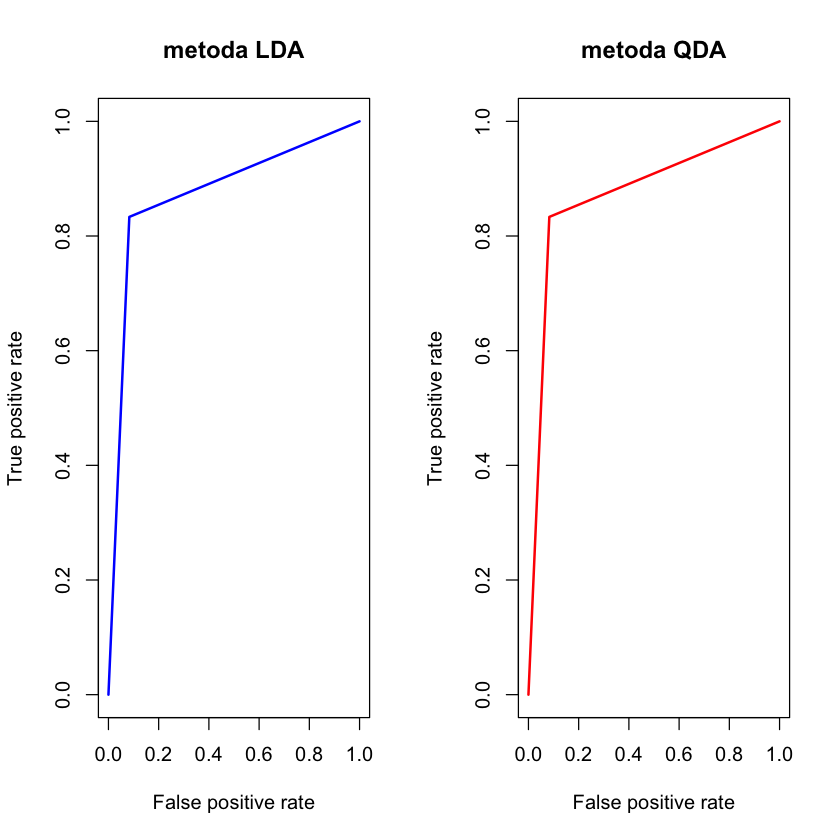

In [63]:
# przygotowanie pola wykresu
par(mfrow = c(1, 2))
# wykres krzywej ROC dla modelu LDA
plot(performance(model_lda_10_6.rocr, "tpr", "fpr"), col = "blue", lwd = 2, main = "metoda LDA")
# wykres krzywej ROC dla modelu QDA
plot(performance(model_qda_10_1.rocr, "tpr", "fpr"), col = "red", lwd = 2, main = "metoda QDA")

In [64]:
# obie metody LDA i QDA daja dokladnie te same wyniki - krzywe ROC dla obu metod sa bardzo podobne
# im mniejszy blad predykcji, tym wieksze pole pod wykresem - metoda LDA wydaje sie tutaj nieznacznie lepsza

## Zadanie 11

In [65]:
# wczytanie i wyswietlenie pierwszych wierszy danych
data(Pima.te)
head(Pima.te)

,npreg,glu,bp,skin,bmi,ped,age,type
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,33.6,0.627,50,Yes
2,1,85,66,29,26.6,0.351,31,No
3,1,89,66,23,28.1,0.167,21,No
4,3,78,50,32,31.0,0.248,26,Yes
5,2,197,70,45,30.5,0.158,53,Yes
6,5,166,72,19,25.8,0.587,51,Yes


In [66]:
# mamy 8 zmiennych, zmienna grupujaca bedzie: type

In [67]:
# informacje na temat zbioru danych
#?Pima.te

In [68]:
# wygenerowanie modelu LDA
model_lda_11_1 = lda(type ~ ., data = Pima.te)
model_lda_11_1

Call:
lda(type ~ ., data = Pima.te)

Prior probabilities of groups:
       No       Yes 
0.6716867 0.3283133 

Group means:
       npreg      glu       bp     skin      bmi       ped      age
No  2.932735 108.1883 70.13004 27.34081 31.63991 0.4645650 29.21525
Yes 4.614679 141.9083 74.77064 32.88991 36.51284 0.6589633 35.61468

Coefficients of linear discriminants:
               LD1
npreg  0.099984437
glu    0.028389957
bp    -0.004602843
skin   0.004726554
bmi    0.052002256
ped    0.615724201
age    0.012235784

In [69]:
# predykcja wzgledem modelu LDA
predykcja_model_lda_11_1 = predict(model_lda_11_1)
predykcja_model_lda_11_1

,No,Yes
1,0.25513470,0.744865300
2,0.97728768,0.022712318
3,0.97969684,0.020303160
4,0.96941434,0.030585662
5,0.11156853,0.888431467
6,0.28074720,0.719252803
7,0.65938356,0.340616442
8,0.79825941,0.201740585
9,0.58998218,0.410017820
10,0.72190981,0.278090187


In [70]:
# wygenerowanie modelu QDA
model_qda_11_2 = qda(type ~ ., data = Pima.te)
model_qda_11_2

Call:
qda(type ~ ., data = Pima.te)

Prior probabilities of groups:
       No       Yes 
0.6716867 0.3283133 

Group means:
       npreg      glu       bp     skin      bmi       ped      age
No  2.932735 108.1883 70.13004 27.34081 31.63991 0.4645650 29.21525
Yes 4.614679 141.9083 74.77064 32.88991 36.51284 0.6589633 35.61468

In [71]:
# predykcja wzgledem modelu QDA
predykcja_model_qda_11_2 = predict(model_qda_11_2)
predykcja_model_qda_11_2

,No,Yes
1,0.601506380,0.3984936204
2,0.970550588,0.0294494120
3,0.993939957,0.0060600434
4,0.961870354,0.0381296460
5,0.027086566,0.9729134339
6,0.111044548,0.8889554517
7,0.599950083,0.4000499172
8,0.496074010,0.5039259895
9,0.746633643,0.2533663571
10,0.381336746,0.6186632540


In [72]:
# tabela predykcji dla metody LDA
tabela_predykcji_model_lda_11_1 = table(True = Pima.te$type, Predicted = predykcja_model_lda_11_1$class)
tabela_predykcji_model_lda_11_1

     Predicted
True   No Yes
  No  199  24
  Yes  47  62

In [73]:
# blad predykcji dla metody LDA
blad_predykcji_model_lda_11_1 = (47 + 24) / dim(Pima.te)[1]
blad_predykcji_model_lda_11_1

[1] 0.2138554

In [74]:
# tabela predykcji dla metody QDA
tabela_predykcji_model_qda_11_2 = table(True = Pima.te$type, Predicted = predykcja_model_qda_11_2$class)
tabela_predykcji_model_qda_11_2

     Predicted
True   No Yes
  No  199  24
  Yes  40  69

In [75]:
# w obu metodach mamy tyle samo blednych predykcji pacjentek bez cukrzycy, ktore byly zakwalifikowane jako pacjentki z cukrzyca
# w metodzie QDA mamy mniej blednych predykcji pacjentek z cukrzyca, ktore byly zakwalifikowane jako pacjentki bez cukrzycy niz w metodzie LDA

In [76]:
# blad predykcji dla metody QDA
blad_predykcji_model_qda_11_2 = (40 + 24) / dim(Pima.te)[1]
blad_predykcji_model_qda_11_2

[1] 0.1927711

In [77]:
# blad predykcji dla metody QDA jest mniejszy o ponad 2% niz dla metody LDA

In [78]:
# wygenerowanie modelu LDA z kroswalidacja
model_lda_kroswalidacja_11_3 = lda(type ~ ., data = Pima.te, CV = TRUE)
model_lda_kroswalidacja_11_3

$class
  [1] Yes No  No  No  Yes Yes No  No  No  No  No  No  No  No  No  No  No  Yes
 [19] Yes No  Yes Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [37] No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No  No  Yes No 
 [55] Yes No  No  No  Yes Yes No  No  No  No  No  No  No  Yes Yes Yes No  Yes
 [73] No  No  No  No  No  Yes Yes No  No  No  No  No  No  Yes No  Yes No  No 
 [91] No  Yes No  No  Yes Yes No  Yes No  Yes Yes No  No  No  Yes Yes Yes Yes
[109] No  No  No  No  Yes No  No  Yes Yes No  No  No  No  No  No  Yes No  No 
[127] No  No  Yes No  No  No  No  Yes No  No  No  No  No  No  Yes No  No  No 
[145] No  No  No  No  No  No  No  Yes No  No  No  Yes Yes No  Yes No  No  Yes
[163] No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  Yes
[181] No  No  Yes Yes Yes No  No  No  No  Yes Yes No  No  No  No  Yes No  Yes
[199] No  No  No  No  Yes No  No  No  No  No  Yes No  No  Yes No  No  No  No 
[217] Yes No  No  No  No  No  Yes No  No  No  No  No  No 

In [79]:
# tabela predykcji dla metody LDA z kroswalidacja
tabela_predykcji_model_lda_kroswalidacja_11_3 = table(True = Pima.te$type, Predicted = model_lda_kroswalidacja_11_3$class)
tabela_predykcji_model_lda_kroswalidacja_11_3

     Predicted
True   No Yes
  No  198  25
  Yes  47  62

In [80]:
# blad predykcji dla metody LDA z kroswalidacja
blad_predykcji_model_lda_kroswalidacja_11_3 = (47 + 25) / dim(Pima.te)[1]
blad_predykcji_model_lda_kroswalidacja_11_3

[1] 0.2168675

In [81]:
# wygenerowanie modelu QDA z kroswalidacja
model_qda_kroswalidacja_11_4 = qda(type ~ ., data = Pima.te, CV = TRUE)
model_qda_kroswalidacja_11_4

$class
  [1] No  No  No  No  Yes Yes No  Yes No  Yes No  Yes No  Yes No  No  No  No 
 [19] Yes No  Yes Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [37] No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No  No  Yes No 
 [55] Yes No  No  No  Yes Yes No  No  No  No  No  Yes No  Yes Yes Yes No  Yes
 [73] No  No  No  No  No  Yes Yes Yes No  No  No  No  No  Yes No  Yes No  No 
 [91] No  No  No  No  Yes Yes No  Yes No  Yes Yes No  No  No  No  Yes Yes Yes
[109] No  No  No  No  Yes No  No  Yes Yes No  No  No  No  No  Yes No  No  No 
[127] No  No  Yes No  No  No  No  Yes No  No  No  No  Yes No  Yes No  No  No 
[145] No  No  Yes No  No  No  No  No  No  No  No  Yes Yes Yes No  No  No  Yes
[163] No  No  No  Yes No  No  No  No  No  No  No  No  Yes No  Yes No  No  Yes
[181] No  No  No  Yes No  No  No  No  No  Yes Yes No  No  No  No  Yes No  Yes
[199] No  No  No  No  Yes No  No  No  No  No  No  No  Yes Yes No  No  No  No 
[217] Yes No  No  No  No  No  Yes No  No  No  No  Yes No 

In [82]:
# tabela predykcji dla metody QDA z kroswalidacja
tabela_predykcji_model_qda_kroswalidacja_11_4 = table(True = Pima.te$type, Predicted = model_qda_kroswalidacja_11_4$class)
tabela_predykcji_model_qda_kroswalidacja_11_4

     Predicted
True   No Yes
  No  191  32
  Yes  42  67

In [83]:
# blad predykcji dla metody QDA z kroswalidacja
blad_predykcji_model_qda_kroswalidacja_11_4 = (42 + 32) / dim(Pima.te)[1]
blad_predykcji_model_qda_kroswalidacja_11_4

[1] 0.2228916

In [84]:
# tutaj wnioski sa przeciwne niz dla metod bez kroswalidacji - metoda LDA z kroswalidacja daje mniejszy blad niz metoda QDA z kroswalidacja
# sa to wartosci gorsze niz dla modelu QDA bez kroswalidacji

In [85]:
# wczytanie paczki
#library(ipred)

In [86]:
# przygotowanie funkcji predykcji
predykcja_2 = function(obiekt, newdata){
# dokonujemy predykcji na obiekcie i nowym zbiorze danych, z czego wyciagamy kolumne $class
# mamy rozne typy zmiennych (w tym znakowe), totez je zostawiamy
    predict(obiekt, newdata = newdata)$class
}

In [87]:
# wygenerowanie modelu LDA z bootstrapem
model_lda_bootstrap_11_5 = errorest(type ~ ., data = Pima.te, model = lda, estimator = "boot", predict = predykcja_2)
model_lda_bootstrap_11_5


Call:
errorest.data.frame(formula = type ~ ., data = Pima.te, model = lda, 
    predict = predykcja_2, estimator = "boot")

	 Bootstrap estimator of misclassification error 
	 with 25 bootstrap replications

Misclassification error:  0.2169 
Standard deviation: 0.0036 


In [88]:
# wygenerowanie modelu QDA z bootstrapem
model_qda_bootstrap_11_6 = errorest(type ~ ., data = Pima.te, model = qda, estimator = "boot", predict = predykcja_2)
model_qda_bootstrap_11_6


Call:
errorest.data.frame(formula = type ~ ., data = Pima.te, model = qda, 
    predict = predykcja_2, estimator = "boot")

	 Bootstrap estimator of misclassification error 
	 with 25 bootstrap replications

Misclassification error:  0.228 
Standard deviation: 0.0048 


In [89]:
# oba bledy predyckji dla metod LDA i QDA z bootstrapem sa bardzo podobne (czesciej jednak model LDA jest niewiele lepszy)

In [90]:
# przygotowanie krzywych ROC dla modeli LDA i QDA
model_lda_11_1.rocr = prediction(as.numeric(predykcja_model_lda_11_1$class), Pima.te$type)
model_qda_11_2.rocr = prediction(as.numeric(predykcja_model_qda_11_2$class), Pima.te$type)

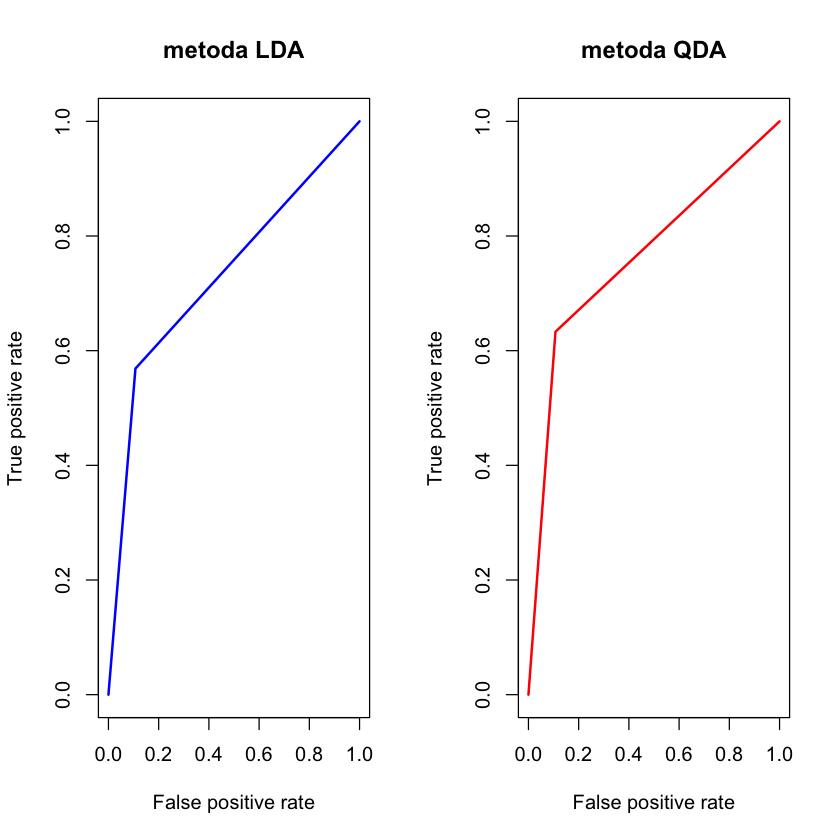

In [91]:
# przygotowanie pola wykresu
par(mfrow = c(1, 2))
# wykres krzywej ROC dla modelu LDA
plot(performance(model_lda_11_1.rocr, "tpr", "fpr"), col = "blue", lwd = 2, main = "metoda LDA")
# wykres krzywej ROC dla modelu QDA
plot(performance(model_qda_11_2.rocr, "tpr", "fpr"), col = "red", lwd = 2, main = "metoda QDA")

In [92]:
# na podstawie wykresu widac, ze metoda QDA jest niewiele lepsza niz metoda LDA

In [93]:
# sprawdzenie modelu logistycznego
model_glm_11_7 = glm(type ~ ., data = Pima.te, family = binomial())
model_glm_11_7


Call:  glm(formula = type ~ ., family = binomial(), data = Pima.te)

Coefficients:
(Intercept)        npreg          glu           bp         skin          bmi  
  -9.514019     0.140944     0.037481    -0.008675     0.013167     0.078951  
        ped          age  
   1.110131     0.018055  

Degrees of Freedom: 331 Total (i.e. Null);  324 Residual
Null Deviance:	    420.3 
Residual Deviance: 285.8 	AIC: 301.8

In [94]:
# podsumowanie modelu logistycznego
summary(model_glm_11_7)


Call:
glm(formula = type ~ ., family = binomial(), data = Pima.te)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9647  -0.6582  -0.3608   0.6158   2.4646  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.514019   1.229278  -7.740 9.98e-15 ***
npreg        0.140944   0.059652   2.363  0.01814 *  
glu          0.037481   0.005558   6.743 1.55e-11 ***
bp          -0.008675   0.012589  -0.689  0.49076    
skin         0.013167   0.020025   0.658  0.51084    
bmi          0.078951   0.028432   2.777  0.00549 ** 
ped          1.110131   0.446921   2.484  0.01299 *  
age          0.018055   0.018359   0.983  0.32537    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 420.30  on 331  degrees of freedom
Residual deviance: 285.79  on 324  degrees of freedom
AIC: 301.79

Number of Fisher Scoring iterations: 5


In [95]:
# niektore zmienne sa nieistotne statystycznie - mozemy je stopniowo wyrzucac
# najwieksza p-wartosc ma zmienna skin, ktora wyrzucamy z modelu

In [96]:
# model logistyczny bez zmiennej skin
model_glm_11_8 = glm(type ~ . -skin, data = Pima.te, family = binomial())
model_glm_11_8


Call:  glm(formula = type ~ . - skin, family = binomial(), data = Pima.te)

Coefficients:
(Intercept)        npreg          glu           bp          bmi          ped  
  -9.498006     0.144472     0.037504    -0.008929     0.090059     1.114373  
        age  
   0.018333  

Degrees of Freedom: 331 Total (i.e. Null);  325 Residual
Null Deviance:	    420.3 
Residual Deviance: 286.2 	AIC: 300.2

In [97]:
# podsumowanie modelu logistycznego bez zmiennej skin
summary(model_glm_11_8)


Call:
glm(formula = type ~ . - skin, family = binomial(), data = Pima.te)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9412  -0.6544  -0.3687   0.6139   2.4849  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.498006   1.230343  -7.720 1.17e-14 ***
npreg        0.144472   0.059521   2.427   0.0152 *  
glu          0.037504   0.005542   6.767 1.31e-11 ***
bp          -0.008929   0.012561  -0.711   0.4772    
bmi          0.090059   0.023071   3.904 9.48e-05 ***
ped          1.114373   0.445481   2.502   0.0124 *  
age          0.018333   0.018319   1.001   0.3169    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 420.30  on 331  degrees of freedom
Residual deviance: 286.22  on 325  degrees of freedom
AIC: 300.22

Number of Fisher Scoring iterations: 5


In [98]:
# najwieksza p-wartosc ma zmienna bp, ktora wyrzucamy z modelu

In [99]:
# model logistyczny bez zmiennej bp
model_glm_11_9 = glm(type ~ . -skin -bp, data = Pima.te, family = binomial())
model_glm_11_9


Call:  glm(formula = type ~ . - skin - bp, family = binomial(), data = Pima.te)

Coefficients:
(Intercept)        npreg          glu          bmi          ped          age  
   -9.82468      0.14533      0.03721      0.08479      1.12721      0.01482  

Degrees of Freedom: 331 Total (i.e. Null);  326 Residual
Null Deviance:	    420.3 
Residual Deviance: 286.7 	AIC: 298.7

In [100]:
# podsumowanie modelu logistycznego bez zmiennej bp
summary(model_glm_11_9)


Call:
glm(formula = type ~ . - skin - bp, family = binomial(), data = Pima.te)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9314  -0.6352  -0.3694   0.6158   2.5430  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.824679   1.150706  -8.538  < 2e-16 ***
npreg        0.145332   0.059183   2.456 0.014063 *  
glu          0.037208   0.005501   6.764 1.34e-11 ***
bmi          0.084786   0.021952   3.862 0.000112 ***
ped          1.127209   0.445553   2.530 0.011409 *  
age          0.014817   0.017501   0.847 0.397204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 420.30  on 331  degrees of freedom
Residual deviance: 286.73  on 326  degrees of freedom
AIC: 298.73

Number of Fisher Scoring iterations: 5


In [101]:
# najwieksza p-wartosc ma zmienna age, ktora wyrzucamy z modelu

In [102]:
# model logistyczny bez zmiennej age
model_glm_11_10 = glm(type ~ . -skin -bp -age, data = Pima.te, family = binomial())
model_glm_11_10


Call:  glm(formula = type ~ . - skin - bp - age, family = binomial(), 
    data = Pima.te)

Coefficients:
(Intercept)        npreg          glu          bmi          ped  
   -9.55218      0.17807      0.03797      0.08411      1.16566  

Degrees of Freedom: 331 Total (i.e. Null);  327 Residual
Null Deviance:	    420.3 
Residual Deviance: 287.4 	AIC: 297.4

In [103]:
# podsumowanie modelu logistycznego bez zmiennej age
summary(model_glm_11_10)


Call:
glm(formula = type ~ . - skin - bp - age, family = binomial(), 
    data = Pima.te)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9845  -0.6462  -0.3661   0.5977   2.5304  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.552177   1.096207  -8.714  < 2e-16 ***
npreg        0.178066   0.045343   3.927  8.6e-05 ***
glu          0.037971   0.005442   6.978  3.0e-12 ***
bmi          0.084107   0.021950   3.832 0.000127 ***
ped          1.165658   0.444054   2.625 0.008664 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 420.30  on 331  degrees of freedom
Residual deviance: 287.44  on 327  degrees of freedom
AIC: 297.44

Number of Fisher Scoring iterations: 5


In [104]:
# pozostale zmienne w modelu sa istotne statystycznie

In [105]:
# wygenerowanie modelu LDA z wybranymi zmiennymi
model_lda_11_11 = lda(type ~ . -skin -bp -age, data = Pima.te)
model_lda_11_11

Call:
lda(type ~ . - skin - bp - age, data = Pima.te)

Prior probabilities of groups:
       No       Yes 
0.6716867 0.3283133 

Group means:
       npreg      glu      bmi       ped
No  2.932735 108.1883 31.63991 0.4645650
Yes 4.614679 141.9083 36.51284 0.6589633

Coefficients of linear discriminants:
             LD1
npreg 0.12387931
glu   0.02896232
bmi   0.05369132
ped   0.65309963

In [106]:
# predykcja wzgledem modelu LDA z wybranymi zmiennymi
predykcja_model_lda_11_11 = predict(model_lda_11_11)
predykcja_model_lda_11_11

,No,Yes
1,0.31196558,0.688034423
2,0.98073328,0.019266725
3,0.97833154,0.021668464
4,0.97322605,0.026773948
5,0.18235867,0.817641331
6,0.32822081,0.671779193
7,0.68852478,0.311475219
8,0.86661053,0.133389469
9,0.55867112,0.441328882
10,0.67009666,0.329903340


In [107]:
# wygenerowanie modelu QDA z wybranymi zmiennymi
model_qda_11_12 = qda(type ~ . -skin -bp -age, data = Pima.te)
model_qda_11_12

Call:
qda(type ~ . - skin - bp - age, data = Pima.te)

Prior probabilities of groups:
       No       Yes 
0.6716867 0.3283133 

Group means:
       npreg      glu      bmi       ped
No  2.932735 108.1883 31.63991 0.4645650
Yes 4.614679 141.9083 36.51284 0.6589633

In [108]:
# predykcja wzgledem modelu QDA z wybranymi zmiennymi
predykcja_model_qda_11_12 = predict(model_qda_11_12)
predykcja_model_qda_11_12

,No,Yes
1,0.4547527107,0.545247289
2,0.9877967715,0.012203229
3,0.9856880492,0.014311951
4,0.9749273867,0.025072613
5,0.0056087413,0.994391259
6,0.2081445765,0.791855423
7,0.6433770819,0.356622918
8,0.8591520615,0.140847939
9,0.7432315522,0.256768448
10,0.5602209011,0.439779099


In [109]:
# przygotowanie krzywych ROC dla modeli LDA i QDA z wybranymi zmiennymi
model_lda_11_11.rocr = prediction(as.numeric(predykcja_model_lda_11_11$class), Pima.te$type)
model_qda_11_12.rocr = prediction(as.numeric(predykcja_model_qda_11_12$class), Pima.te$type)

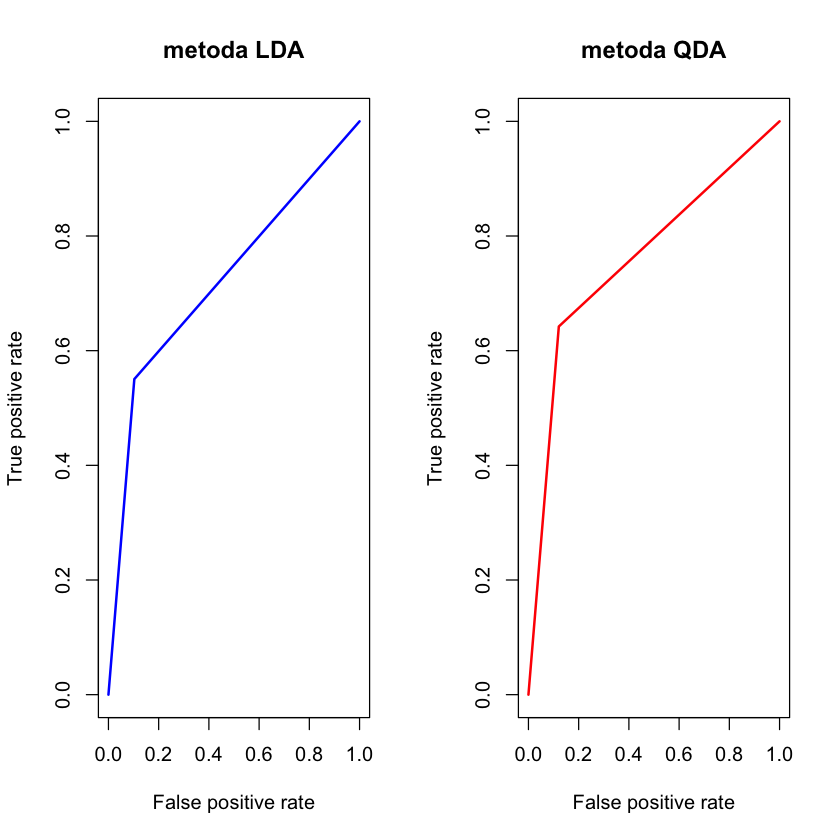

In [110]:
# przygotowanie pola wykresu
par(mfrow = c(1, 2))
# wykres krzywej ROC dla modelu LDA z wybranymi zmiennymi
plot(performance(model_lda_11_11.rocr, "tpr", "fpr"), col = "blue", lwd = 2, main = "metoda LDA")
# wykres krzywej ROC dla modelu QDA z wybranymi zmiennymi
plot(performance(model_qda_11_12.rocr, "tpr", "fpr"), col = "red", lwd = 2, main = "metoda QDA")

In [111]:
# dla modeli z wybranymi zmiennymi lepsza metoda ponownie jest QDA
# oba wykresy wygladaja bardzo podobnie do pelnych modeli metod LDA i QDA

In [112]:
# tabela predykcji dla metody LDA z wybranymi zmiennymi
tabela_predykcji_model_lda_11_11 = table(True = Pima.te$type, Predicted = predykcja_model_lda_11_11$class)
tabela_predykcji_model_lda_11_11

     Predicted
True   No Yes
  No  200  23
  Yes  49  60

In [113]:
# blad predykcji dla metody LDA z wybranymi zmiennymi
blad_predykcji_model_lda_11_11 = (49 + 23) / dim(Pima.te)[1]
blad_predykcji_model_lda_11_11

[1] 0.2168675

In [114]:
# tabela predykcji dla metody QDA z wybranymi zmiennymi
tabela_predykcji_model_qda_11_12 = table(True = Pima.te$type, Predicted = predykcja_model_qda_11_12$class)
tabela_predykcji_model_qda_11_12

     Predicted
True   No Yes
  No  196  27
  Yes  39  70

In [115]:
# blad predykcji dla metody QDA z wybranymi zmiennymi
blad_predykcji_model_qda_11_12 = (39 + 27) / dim(Pima.te)[1]
blad_predykcji_model_qda_11_12

[1] 0.1987952

In [116]:
# ponownie metoda QDA jest lepsza niz LDA
# model QDA z wybranymi zmiennymi nadal nie ma jednak najmniejszego bledu predykcji z dotychczas przygotowanych modeli

In [117]:
# czesto jedna metoda okresla lepiej jedna grupe a druga metoda druga grupe
# dla nas pacjentki zdrowe lepiej okresla model LDA a pacjentki chore model QDA - byc moze polaczenie obu metod przyniosloby najmniejszy blad